In [1]:
import yfinance as yf
import statsmodels.api as sm

In [3]:
tickers = ['AAPL','MSFT','AMZN','NVDA','GOOG','META','TSLA','^GSPC']
data = yf.download(tickers, start='2022-01-01',end='2023-12-31')['Adj Close']

[*********************100%***********************]  8 of 8 completed


In [4]:
data.head()

Ticker,AAPL,AMZN,GOOG,META,MSFT,NVDA,TSLA,^GSPC
Date,,,,,,,,
2022-01-03 00:00:00+00:00,179.076599,170.404495,144.719086,337.523743,326.940826,30.073061,399.926666,4796.560059
2022-01-04 00:00:00+00:00,176.803818,167.522003,144.062714,335.519806,321.334717,29.243385,383.196655,4793.540039
2022-01-05 00:00:00+00:00,172.100845,164.356995,137.316284,323.196899,308.999359,27.560066,362.706665,4700.580078
2022-01-06 00:00:00+00:00,169.227936,163.253998,137.214035,331.462006,306.557739,28.133150,354.899994,4696.049805
2022-01-07 00:00:00+00:00,169.395187,162.554001,136.668869,330.794006,306.713989,27.203630,342.320007,4677.029785


In [5]:
benchmark_return= (
    data
    .pop("^GSPC")
    .pct_change()
    .dropna()
)
benchmark_return

,^GSPC
Date,
2022-01-04 00:00:00+00:00,-0.000630
2022-01-05 00:00:00+00:00,-0.019393
2022-01-06 00:00:00+00:00,-0.000964
2022-01-07 00:00:00+00:00,-0.004050
2022-01-10 00:00:00+00:00,-0.001441
...,...
2023-12-22 00:00:00+00:00,0.001660
2023-12-26 00:00:00+00:00,0.004232
2023-12-27 00:00:00+00:00,0.001430


In [7]:
portfolio_returns=(
    data
    .pct_change()
    .dropna()
    .sum(axis=1)
)

portfolio_returns

,0
Date,
2022-01-04 00:00:00+00:00,-0.126648
2022-01-05 00:00:00+00:00,-0.278472
2022-01-06 00:00:00+00:00,-0.007207
2022-01-07 00:00:00+00:00,-0.077265
2022-01-10 00:00:00+00:00,0.030479
...,...
2023-12-22 00:00:00+00:00,-0.011950
2023-12-26 00:00:00+00:00,0.027394
2023-12-27 00:00:00+00:00,0.018902


<Axes: xlabel='Date'>

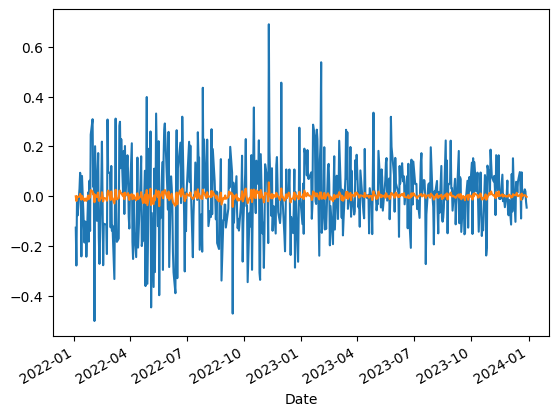

In [8]:
portfolio_returns.plot()
benchmark_return.plot()

In [11]:
def linreg(x,y):
  x = sm.add_constant(x)
  model = sm.OLS(y,x).fit()
  return model

X = benchmark_return.values
Y = portfolio_returns.values

model = linreg(X,Y)
alpha, beta = model.params[0], model.params[1]

print(f'Alpha: {alpha}')
print(f'Beta: {beta}')

Alpha: 0.0024185827394012627
Beta: 11.31608870436166
